# **Análisis y Modelado de Dataset de Empleados**

Este proyecto desarrolla el análisis y modelado sobre un dataset de empleados de una empresa. El dataset incluye información sobre la educación, año de incorporación, ciudad de trabajo, categoría salarial, edad, género, si han sido asignados temporalmente a la banca (EverBenched), experiencia en el dominio actual y si el empleado tomó tiempo libre (LeaveOrNot). El dataset ha sido modificado para incluir datos faltantes, añadiendo realismo al desafío analítico.

## **1. Preprocesamiento**


In [1]:

import pandas as pd

# Cargar el dataset
file_path = 'EmployeesData.csv'
df = pd.read_csv(file_path)

# Verificar valores faltantes
missing_values = df.isnull().sum()
print('Valores faltantes:\n', missing_values)

# Convertir 'LeaveOrNot' a etiquetas categóricas
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})

# Eliminar filas con valores faltantes en 'ExperienceInCurrentDomain' y 'JoiningYear'
df = df.dropna(subset=['ExperienceInCurrentDomain', 'JoiningYear'])

# Imputar datos faltantes de 'Age' con la media
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Imputar datos faltantes de 'PaymentTier' con la moda
df['PaymentTier'] = df['PaymentTier'].fillna(df['PaymentTier'].mode()[0])

# Filtrar sólo columnas numéricas para el cálculo de valores atípicos
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular Q1 y Q3 y definir límites para valores atípicos
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar valores atípicos
df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Guardar el DataFrame procesado
df.to_csv('EmployeesData_Procesado.csv', index=False)


Valores faltantes:
 Education                     0
JoiningYear                  36
City                          0
PaymentTier                  42
Age                          27
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain    30
LeaveOrNot                    0
dtype: int64


In [3]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,Not Leave
1,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,Not Leave
2,Masters,2016.0,Bangalore,3.0,27.0,Male,No,5.0,Leave
3,Masters,2017.0,Pune,3.0,24.0,Male,Yes,2.0,Leave
4,Bachelors,2015.0,New Delhi,3.0,38.0,Male,No,0.0,Not Leave
...,...,...,...,...,...,...,...,...,...
3417,Bachelors,2013.0,Bangalore,3.0,25.0,Female,No,3.0,Not Leave
3418,Bachelors,2016.0,Pune,3.0,30.0,Male,No,2.0,Not Leave
3419,Bachelors,2013.0,Bangalore,3.0,26.0,Female,No,4.0,Not Leave
3420,Bachelors,2012.0,Bangalore,3.0,30.0,Male,Yes,2.0,Not Leave


## **2. EDA**


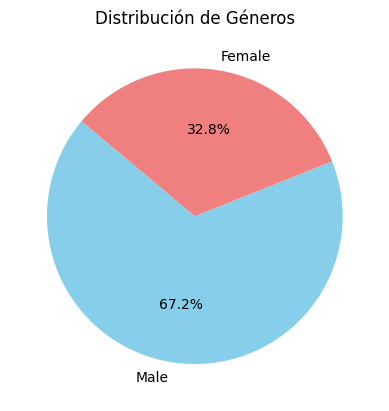

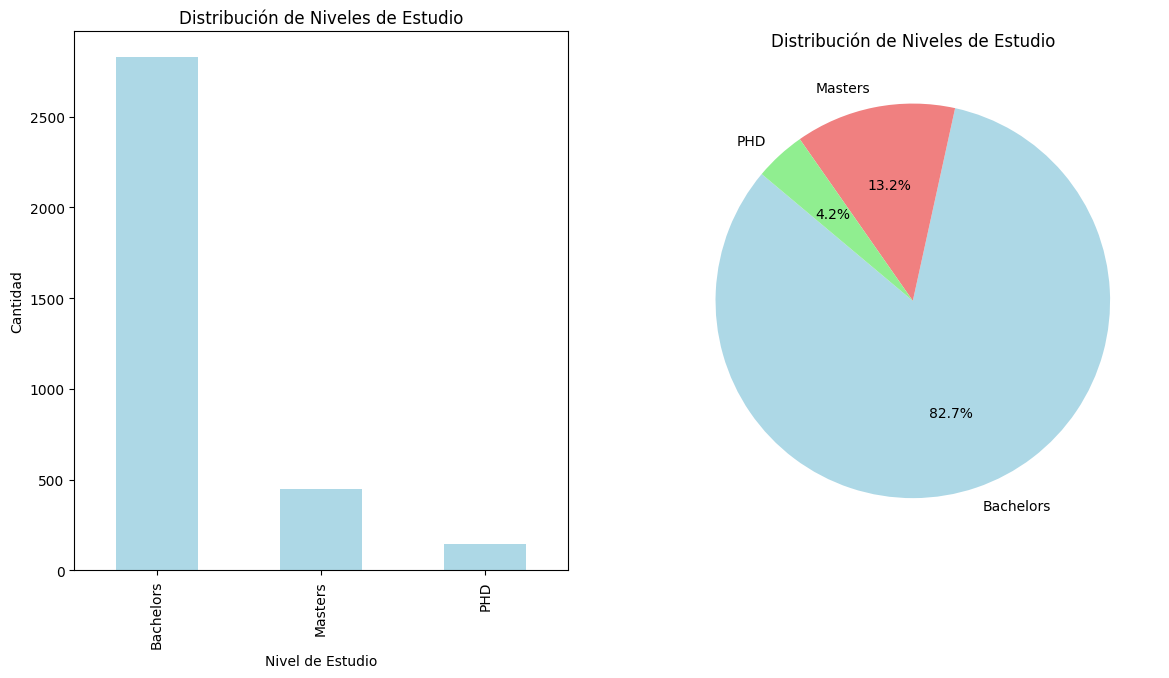

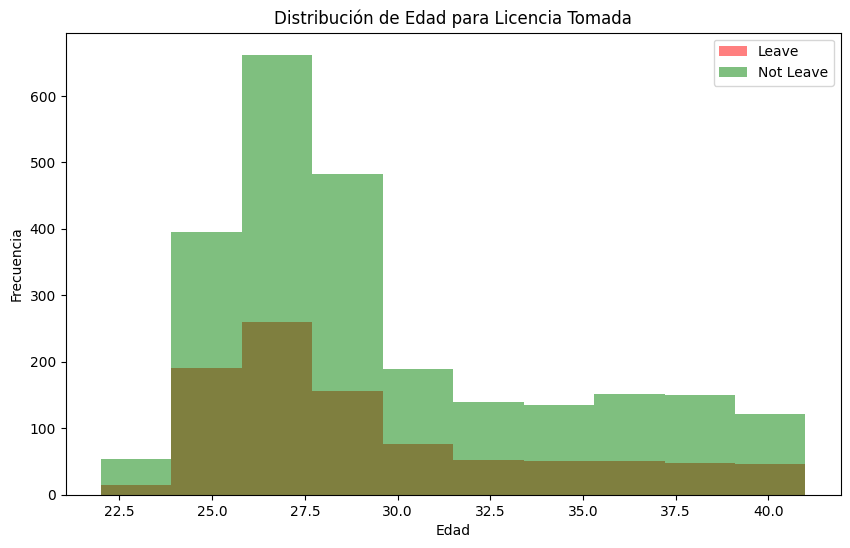

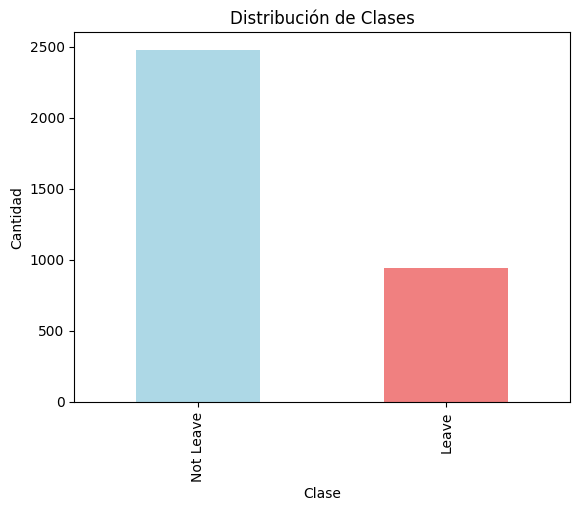

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset procesado
file_path = 'EmployeesData_Procesado.csv'
df = pd.read_csv(file_path)

# Graficar la distribución de los sexos con un gráfico de torta
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.ylabel('')
plt.title('Distribución de Géneros')
plt.show()

# Graficar la distribución de niveles de estudio
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

df['Education'].value_counts().plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_title('Distribución de Niveles de Estudio')
axes[0].set_xlabel('Nivel de Estudio')
axes[0].set_ylabel('Cantidad')

df['Education'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1].set_ylabel('')
axes[1].set_title('Distribución de Niveles de Estudio')

plt.show()

# Responder si los jóvenes son más propensos a tomar licencias
plt.figure(figsize=(10, 6))
df[df['LeaveOrNot'] == 'Leave']['Age'].plot.hist(alpha=0.5, label='Leave', color='red')
df[df['LeaveOrNot'] == 'Not Leave']['Age'].plot.hist(alpha=0.5, label='Not Leave', color='green')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad para Licencia Tomada')
plt.legend()
plt.show()

# Graficar la distribución de clases y verificar balanceo
df['LeaveOrNot'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases')
plt.show()


## **3. Modelado de Datos**


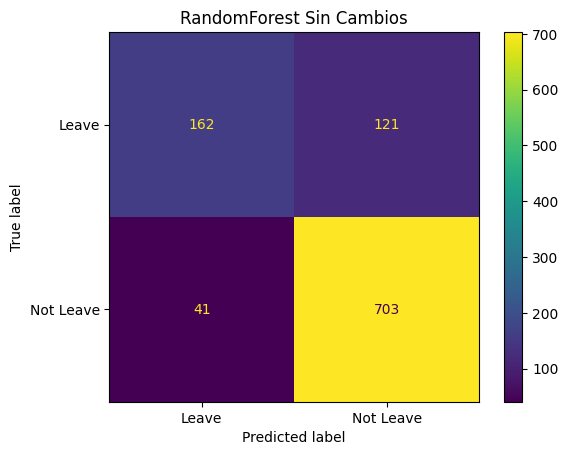

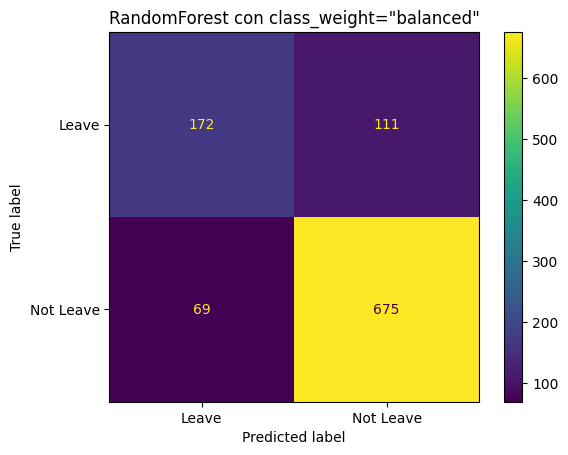

Accuracy (Train/Test) RF: 0.93/0.84
F1 Score (Train/Test) RF: 0.85/0.67
Accuracy (Train/Test) RF Balanced: 0.92/0.82
F1 Score (Train/Test) RF Balanced: 0.85/0.66


In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el dataset procesado
file_path = 'EmployeesData_Procesado.csv'
df = pd.read_csv(file_path)

# Eliminar la columna objetivo y convertir categóricas a dummies
X = pd.get_dummies(df.drop(columns=['LeaveOrNot']), drop_first=True)
y = df['LeaveOrNot']

# Realizar la partición del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# RandomForest sin cambios
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# RandomForest con class_weight="balanced"
rf_balanced = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_balanced.fit(X_train, y_train)
y_pred_train_rf_balanced = rf_balanced.predict(X_train)
y_pred_test_rf_balanced = rf_balanced.predict(X_test)

# Accuracy
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_train_rf_balanced = accuracy_score(y_train, y_pred_train_rf_balanced)
accuracy_test_rf_balanced = accuracy_score(y_test, y_pred_test_rf_balanced)

# F1 Score
f1_train_rf = f1_score(y_train, y_pred_train_rf, pos_label='Leave')
f1_test_rf = f1_score(y_test, y_pred_test_rf, pos_label='Leave')
f1_train_rf_balanced = f1_score(y_train, y_pred_train_rf_balanced, pos_label='Leave')
f1_test_rf_balanced = f1_score(y_test, y_pred_test_rf_balanced, pos_label='Leave')

# Matrices de confusión
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title('RandomForest Sin Cambios')
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_balanced, X_test, y_test)
plt.title('RandomForest con class_weight="balanced"')
plt.show()

# Comparar métricas
print(f"Accuracy (Train/Test) RF: {accuracy_train_rf:.2f}/{accuracy_test_rf:.2f}")
print(f"F1 Score (Train/Test) RF: {f1_train_rf:.2f}/{f1_test_rf:.2f}")
print(f"Accuracy (Train/Test) RF Balanced: {accuracy_train_rf_balanced:.2f}/{accuracy_test_rf_balanced:.2f}")
print(f"F1 Score (Train/Test) RF Balanced: {f1_train_rf_balanced:.2f}/{f1_test_rf_balanced:.2f}")
